<a href="https://colab.research.google.com/github/davidfox87/neuro_encoding_models/blob/master/calculate_average_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Clone the github repository 
!git clone https://github.com/davidfox87/neuro_encoding_models

Cloning into 'neuro_encoding_models'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 653 (delta 26), reused 20 (delta 11), pack-reused 598
Receiving objects: 100% (653/653), 83.69 MiB | 15.88 MiB/s, done.
Resolving deltas: 100% (372/372), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
%cd neuro_encoding_models/

/content/neuro_encoding_models


In [4]:
#@title add package to google colab
import sys, os
sys.path.append(os.getcwd())

In [60]:
#@title import modules

import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import pickle
from numpy import linalg as LA
from glmtools.model import GLM

# Get ORN average filters

In [82]:
stim_filter = []
postspike_filter = []
orn_predictions = []
orn_exp_responses = []
dc = -5 # fuck...forgot to save dc

cells = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
for i in cells:
  pkl_file = open('/content/drive/MyDrive/temporal_filter_data_files_for_colab/ORN/orn' + str(i) + '_out.pkl', 'rb')
  glmpars = pickle.load(pkl_file)
  k = glmpars['k'][1]
  h = glmpars['h'][1]
  stim_filter.append(k / LA.norm(k))
  postspike_filter.append(h / LA.norm(h))
  orn_predictions.append(glmpars['prediction'])
  orn_exp_responses.append(glmpars['response'])


orn_predictions = np.array(orn_predictions)
orn_exp_responses = np.array(orn_exp_responses)

orn_predictions_mu = orn_predictions.mean(axis=0)
orn_predictions_stderr = 1.96*(orn_predictions.std(axis=0)/np.sqrt(13))

orn_exp_responses_mu = orn_exp_responses.mean(axis=0)
orn_exp_responses_sigma2 = 1.96*(orn_exp_responses.std(axis=0)/np.sqrt(13))


In [ ]:
plt.plot(np.arr)

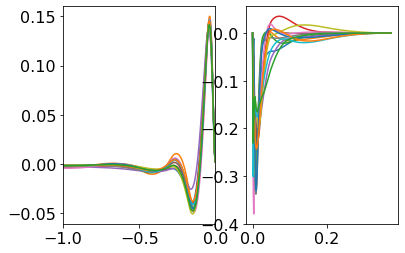

In [54]:
kt = glmpars['k'][0]
stim_filter = np.array(stim_filter)

# post-spike filter
postspike_filter = np.array(postspike_filter)
ht = glmpars['h'][0]

fig, ax = plt.subplots(1, 2)
ax[0].plot(kt, stim_filter.T)
ax[0].set_xlim(-1, 0)
ax[1].plot(ht, postspike_filter.T)

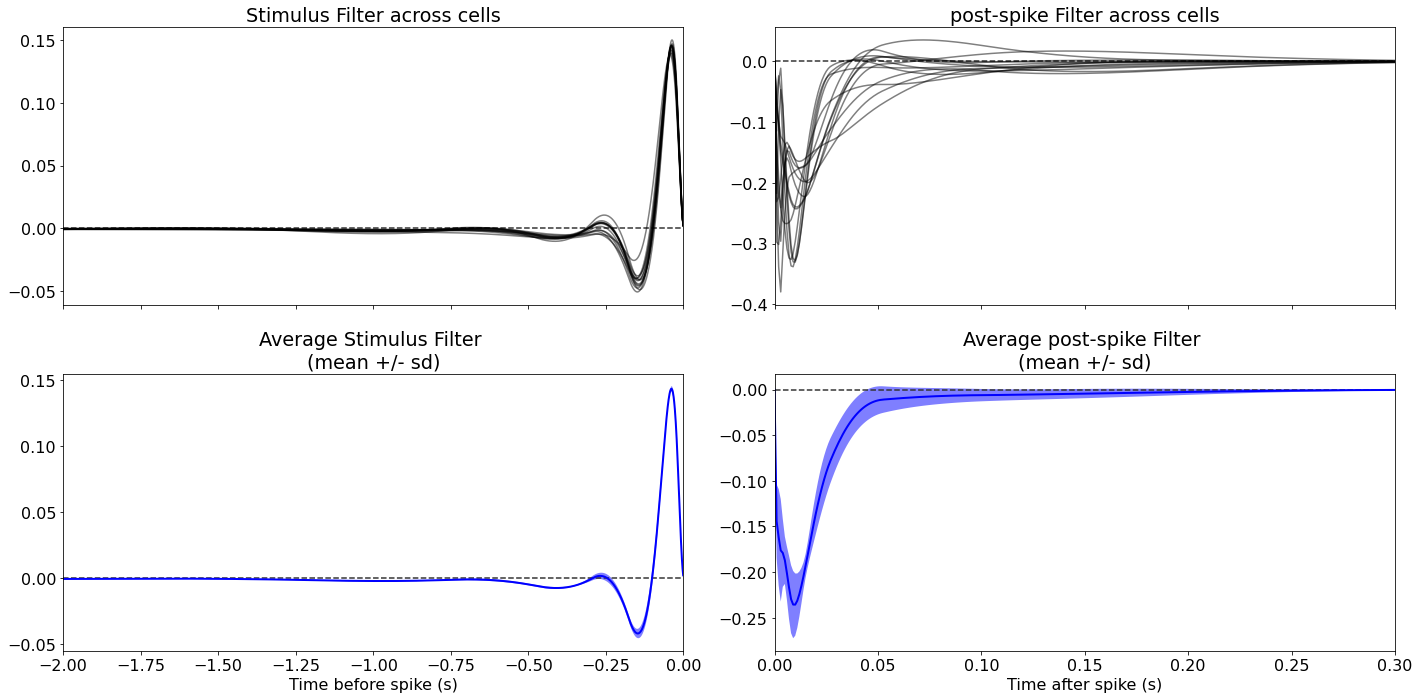

In [55]:
orn_mu = stim_filter.mean(axis=0)
orn_sigma = 1.96*(stim_filter.std(axis=0)/np.sqrt(13))

orn_mu2 = postspike_filter.mean(axis=0)
orn_sigma2 = 1.96*(postspike_filter.std(axis=0)/np.sqrt(13))

plt.rcParams['font.size'] = 16

n = len(cells)
figure, ax = plt.subplots(2, 2, figsize=[20, 10])
ax[0, 0].plot(np.tile(kt, (n, 1)).T, stim_filter.T, 'k', alpha=0.5)
ax[0, 1].plot(np.tile(ht, (n, 1)).T, postspike_filter.T, 'k', alpha=0.5)
ax[0, 0].axhline(0, color=".2", linestyle="--", zorder=1)
ax[0, 1].axhline(0, color=".2", linestyle="--", zorder=1)

ax[1, 0].plot(kt, orn_mu, lw=2, label='mean population 1', color='blue')
ax[1, 0].fill_between(kt, orn_mu + orn_sigma, orn_mu - orn_sigma, facecolor='blue', alpha=0.5)
ax[1, 0].axhline(0, color=".2", linestyle="--", zorder=1)

ax[1, 1].plot(ht, orn_mu2, lw=2, label='mean population 1', color='blue')
ax[1, 1].fill_between(ht, orn_mu2 + orn_sigma2, orn_mu2 - orn_sigma2, facecolor='blue', alpha=0.5)
ax[1, 1].axhline(0, color=".2", linestyle="--", zorder=1)


ax[0, 0].set_xlim(-2, 0)
ax[1, 0].set_xlim(-2, 0)
ax[0, 1].set_xlim(0, 0.3)
ax[1, 1].set_xlim(0, 0.3)
ax[0, 0].set_xticklabels([])
ax[0, 1].set_xticklabels([])

ax[1, 0].set_xlabel('Time before spike (s)')
ax[1, 1].set_xlabel('Time after spike (s)')
ax[0, 0].set_title('Stimulus Filter across cells')
ax[0, 1].set_title('post-spike Filter across cells')
ax[1, 0].set_title('Average Stimulus Filter \n(mean +/- sd)')
ax[1, 1].set_title('Average post-spike Filter \n(mean +/- sd)')
plt.tight_layout()

#figure.suptitle('GLM parameters fit to 13 different ORN recordings across all trials/stimuli')



# make a prediction and compare with actual psth

# export average filters (with std) and prediction so i can plot in master fig

# Get PN average filters

In [56]:
stim_filter = []
postspike_filter = []
dc = -5 # fuck...forgot to save dc

cells = [1, 2, 3, 4, 5, 6, 7, 8]
for i in cells:
  pkl_file = open('/content/drive/MyDrive/temporal_filter_data_files_for_colab/PN/pn' + str(i) + '_out.pkl', 'rb')
  glmpars = pickle.load(pkl_file)
  k = glmpars['k'][1]
  h = glmpars['h'][1]
  stim_filter.append(k / LA.norm(k))
  postspike_filter.append(h / LA.norm(h))
  
		

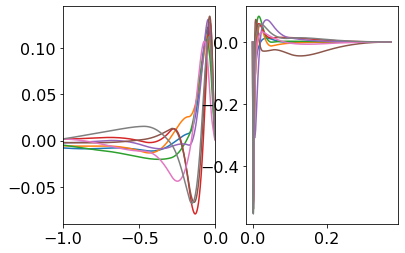

In [57]:
kt = glmpars['k'][0]
stim_filter = np.array(stim_filter)

# post-spike filter
postspike_filter = np.array(postspike_filter)
ht = glmpars['h'][0]

fig, ax = plt.subplots(1, 2)
ax[0].plot(kt, stim_filter.T)
ax[0].set_xlim(-1, 0)
ax[1].plot(ht, postspike_filter.T)

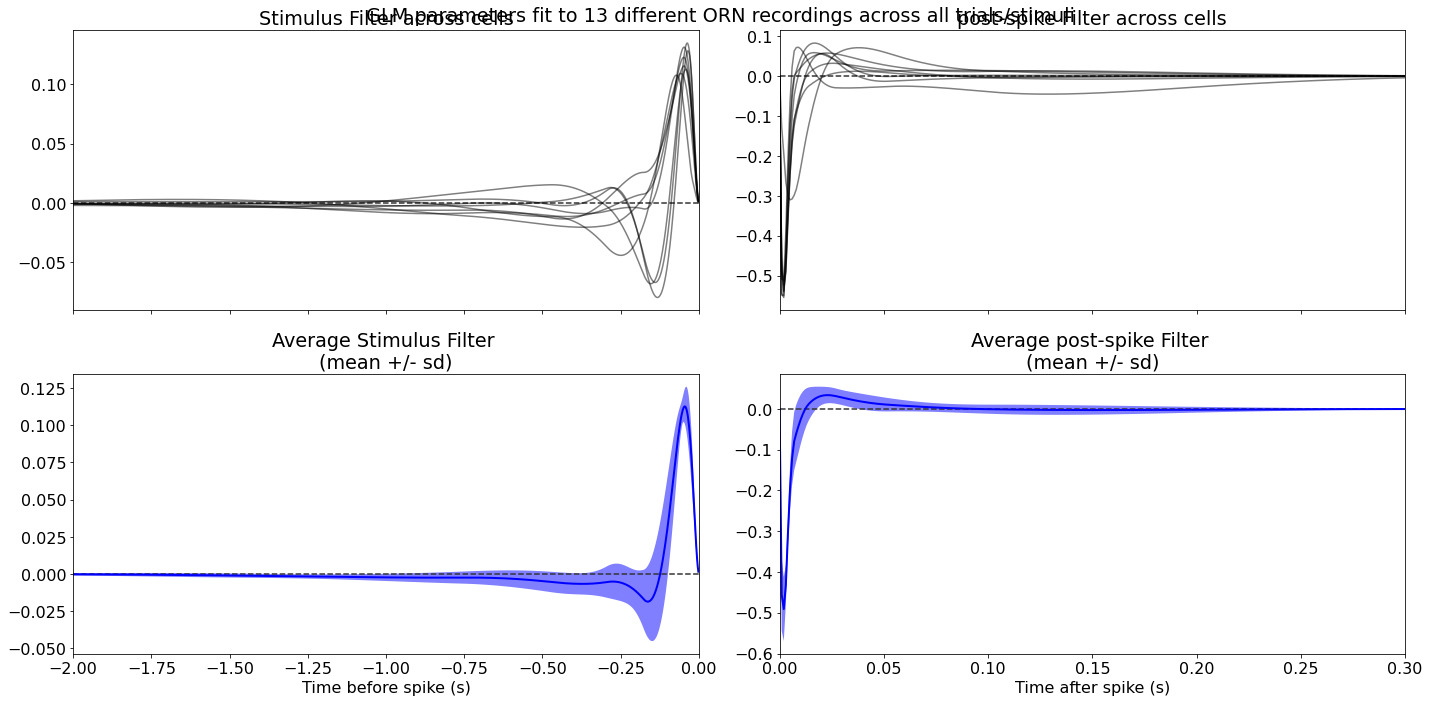

In [58]:
pn_mu = stim_filter.mean(axis=0)
pn_sigma = 1.96*(stim_filter.std(axis=0)/np.sqrt(8))

pn_mu2 = postspike_filter.mean(axis=0)
pn_sigma2 = 1.96*(postspike_filter.std(axis=0)/np.sqrt(8))

plt.rcParams['font.size'] = 16

n = len(cells)
figure, ax = plt.subplots(2, 2, figsize=[20, 10])
ax[0, 0].plot(np.tile(kt, (n, 1)).T, stim_filter.T, 'k', alpha=0.5)
ax[0, 1].plot(np.tile(ht, (n, 1)).T, postspike_filter.T, 'k', alpha=0.5)
ax[0, 0].axhline(0, color=".2", linestyle="--", zorder=1)
ax[0, 1].axhline(0, color=".2", linestyle="--", zorder=1)

ax[1, 0].plot(kt, pn_mu, lw=2, label='mean population 1', color='blue')
ax[1, 0].fill_between(kt, pn_mu + pn_sigma, pn_mu - pn_sigma, facecolor='blue', alpha=0.5)
ax[1, 0].axhline(0, color=".2", linestyle="--", zorder=1)

ax[1, 1].plot(ht, pn_mu2, lw=2, label='mean population 1', color='blue')
ax[1, 1].fill_between(ht, pn_mu2 + pn_sigma2, pn_mu2 - pn_sigma2, facecolor='blue', alpha=0.5)
ax[1, 1].axhline(0, color=".2", linestyle="--", zorder=1)

figure.suptitle('GLM parameters fit to 13 different ORN recordings across all trials/stimuli')

ax[0, 0].set_xlim(-2, 0)
ax[1, 0].set_xlim(-2, 0)
ax[0, 1].set_xlim(0, 0.3)
ax[1, 1].set_xlim(0, 0.3)
ax[0, 0].set_xticklabels([])
ax[0, 1].set_xticklabels([])

ax[1, 0].set_xlabel('Time before spike (s)')
ax[1, 1].set_xlabel('Time after spike (s)')
ax[0, 0].set_title('Stimulus Filter across cells')
ax[0, 1].set_title('post-spike Filter across cells')
ax[1, 0].set_title('Average Stimulus Filter \n(mean +/- sd)')
ax[1, 1].set_title('Average post-spike Filter \n(mean +/- sd)')

plt.tight_layout()

(-4.0, 0.0)

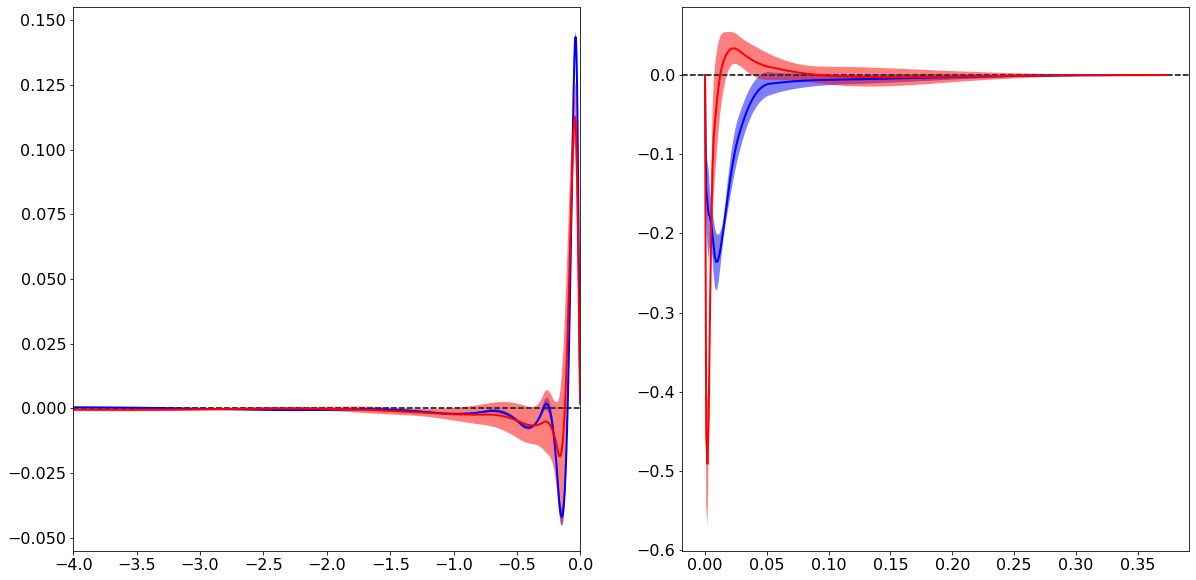

In [59]:
figure, ax = plt.subplots(1, 2, figsize=[20, 10])

ax[0].plot(kt, orn_mu, lw=2, label='mean population 1', color='blue')
ax[0].fill_between(kt, orn_mu + orn_sigma, orn_mu - orn_sigma, facecolor='blue', alpha=0.5)
ax[0].axhline(0, color=".2", linestyle="--", zorder=1)

ax[1].plot(ht, orn_mu2, lw=2, label='mean population 1', color='blue')
ax[1].fill_between(ht, orn_mu2 + orn_sigma2, orn_mu2 - orn_sigma2, facecolor='blue', alpha=0.5)
ax[1].axhline(0, color=".2", linestyle="--", zorder=1)



ax[0].plot(kt, pn_mu, lw=2, label='mean population 1', color='red')
ax[0].fill_between(kt, pn_mu + pn_sigma, pn_mu - pn_sigma, facecolor='red', alpha=0.5)
ax[0].axhline(0, color=".2", linestyle="--", zorder=1)

ax[1].plot(ht, pn_mu2, lw=2, label='mean population 1', color='red')
ax[1].fill_between(ht, pn_mu2 + pn_sigma2, pn_mu2 - pn_sigma2, facecolor='red', alpha=0.5)
ax[1].axhline(0, color=".2", linestyle="--", zorder=1)

ax[0].set_xlim(-4, 0)

# average together all of the prediction (it doesn't make sense to simulate a glm with average filters)